# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2022W2/tree/main/lectures) 

**Due date: Monday Jan 23, 2023 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are allowed to work and submit in pairs in this homework assignment. 

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index. **Note:** you may need to change the name of the file if it does not match the download.

In [2]:
spotify_df = pd.read_csv("spotify.csv", index_col=0)

Excluding the target, how many columns (potential features) does the dataset include?

*15 potential features*

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

*Train has 1613 examples, and Test has 404 examples*

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the largest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
df_stats = df_train.describe()
df_stats.loc['Range'] = df_stats.loc['max'] - df_stats.loc['min']
df_stats

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000
Range,0.993997,0.836000,9.885850e+05,0.981400,0.976000,11.000000,0.950200,30.364000,1.000000,0.598900,171.472000,4.000000,0.936700,1.000000


*The feature with the largest range is duration_ms, with a range of 988,585 ms*

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of the loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

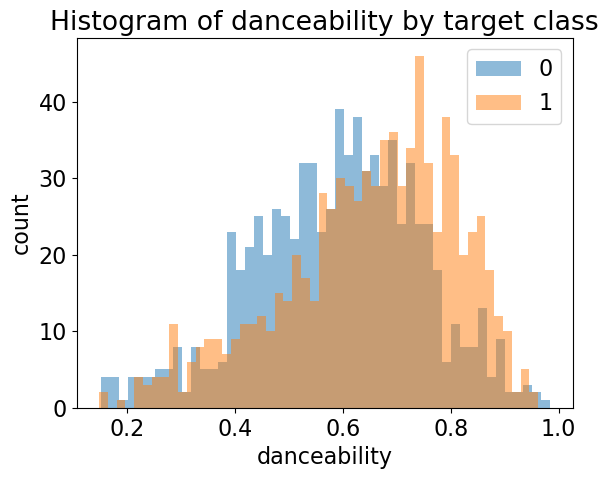

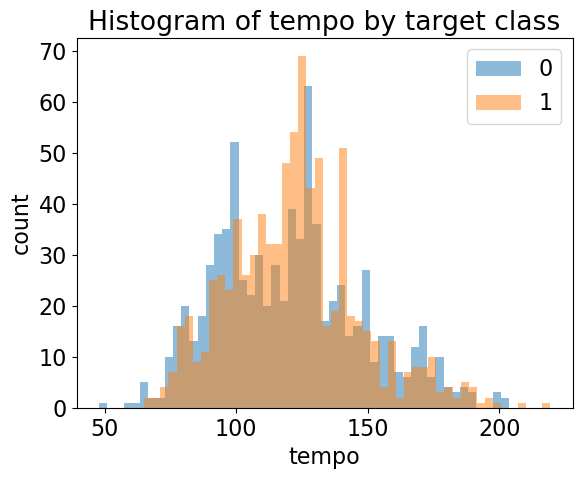

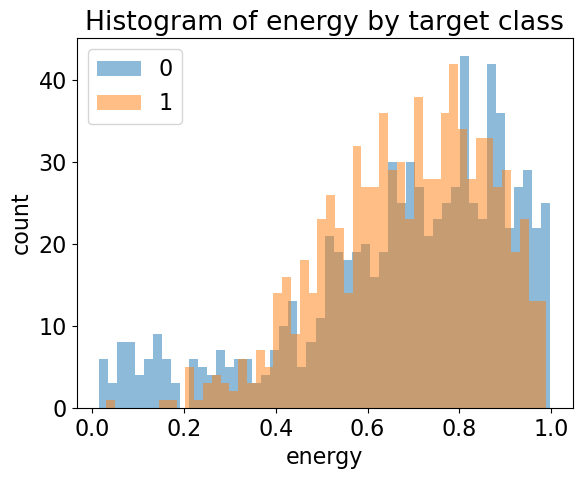

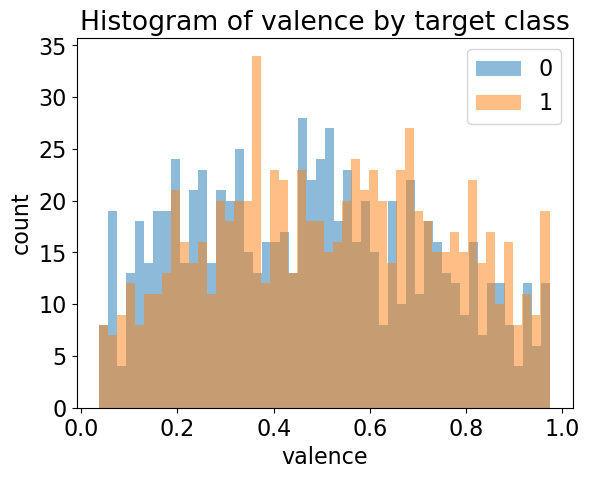

In [5]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

features = ["danceability", "tempo", "energy", "valence"]

for feature in features:
    negatives = negative_examples[feature]
    positives = positive_examples[feature]
    plt.hist(negatives, bins=50, alpha=0.5, label=0)
    plt.hist(positives, bins=50, alpha=0.5, label=1)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title("Histogram of " + feature + " by target class")
    plt.legend()
    plt.show()
    

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

A reasonable split would be to predict 1 if danceability > 0.7 (and predict 0 otherwise)

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



A feature could still be useful if the histograms for that feature are identical for the two target classes. For example, this feature could be highly significant when combined with another feature.

For example, maybe feature A by itself creates identical histograms for the two target classes. However, maybe if feature A =< 0.5, then the target class can be perfectly predicted by feature B, and if A > 0.5, then the target class can be perfectly predicted by feature C. So while that feature on its own isn't useful for prediction, the feature could be very enlightening when combined with other features in a decision tree.

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [6]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

I think these features could be very useful. 

For example, the user might really like one Artist, and the data would reflect that. If a song by that Artist shows up, the model should predict that the user likes that Artist. Traits of the Artist, like their voice or themes they often sing about, would not be well represented by other features and so it is important to keep the Artist feature in the dataset.

Similarly, the title can contain other information that is important to the user. For example, a user might not like songs with long titles, even if they like how it sounds. Or the title can include a hint to the song's themes, or another artist that it features. This is all information that cannot be identified from other features, and so should be included.

The problem with these features is that they are text, and so do not easily fit into a decision tree.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [7]:
#Adapted from Lecture 2
X_train = df_train.drop(columns=["target", "song_title", "artist"])
y_train = df_train["target"]

X_test = df_test.drop(columns=["target", "song_title", "artist"])
y_test = df_test["target"]


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_train.iloc[[9]])

print("The model predicted " + str(prediction) + " and the actual value is " + str(y_train.iloc[9]))

The model predicted [1] and the actual value is 1


#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the tenth example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the tenth example with `X_train.iloc[[9]]`.

It is correct. The model predicts 1, and the corresponding actual value is 1.

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [8]:
#Adapted from Lecture 3
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
cv_scores

array([0.7037037 , 0.64814815, 0.64197531, 0.72670807, 0.70807453,
       0.60869565, 0.72049689, 0.70807453, 0.64596273, 0.68944099])

In [9]:
print(f"Average cross-validation score = {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation score = {np.std(cv_scores):.4f}")

Average cross-validation score = 0.6801
Standard deviation of cross-validation score = 0.0384


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [10]:
#Adapted from Lecture 3
from sklearn.model_selection import cross_validate
cv_out = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
cv_test_scores = cv_out["test_score"]
cv_train_scores = cv_out["train_score"]

print(f"Average cross-validation score = {np.mean(cv_test_scores):.4f}")
print(f"Average train score = {np.mean(cv_train_scores):.4f}")
cv_out["test_score"]

Average cross-validation score = 0.6814
Average train score = 0.9989


array([0.67283951, 0.59876543, 0.64814815, 0.70807453, 0.73913043,
       0.62111801, 0.74534161, 0.72670807, 0.65838509, 0.69565217])

The score is not exactly the same, although it is very similar. scikit-learn.org states explains that this difference comes from a slight difference in implementation:
"The result of cross_val_predict may be different from those obtained using cross_val_score as the elements are grouped in different ways. The function cross_val_score takes an average over cross-validation folds, whereas cross_val_predict simply returns the labels (or probabilities) from several distinct models undistinguished."

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

There is a significant difference. The Train score is near perfect, while the cross-validation score hovers just below 70% accuracy. Having a higher train score than validation score is pretty much guaranteed, and the fact that the train score is nearly 1.0 could imply that the model is over-fitting.

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

The sub-scores for the first method (using cross_val_score) have a range from ~0.60 to ~0.78, while the second method (using cross_validate) sub-scores have a range from ~0.60 to ~0.74, which is important to look at. A large range in these sub-scores show that certain cohorts of the data are creating very different models. A very large range would reduce the trustworthiness of the overall averaged cross validation score. A very tight range would increase the confidence in the overall score. This is just like any data: a large spread reduces the confidence in the calculated average.

In this case, the range is larger in the first method than the second, implying that we should trust the second overall average more (although both averages are pretty much identical to each other).

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

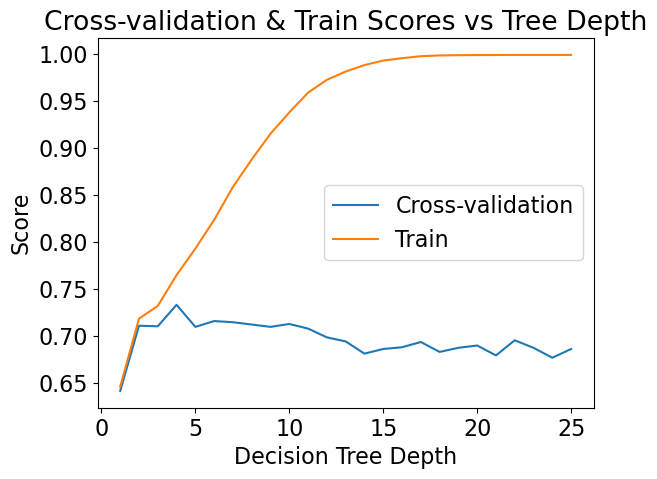

In [11]:
depths = []
test_scores = []
train_scores = []

for depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth = depth)
    cv_out = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    cv_test_scores = cv_out["test_score"]
    cv_train_scores = cv_out["train_score"]
    
    depths.append(depth)
    test_scores.append(np.mean(cv_test_scores))
    train_scores.append(np.mean(cv_train_scores))
    

plt.plot(depths, test_scores, label='Cross-validation')
plt.plot(depths, train_scores, label='Train')
plt.title('Cross-validation & Train Scores vs Tree Depth')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Score')
plt.legend()
plt.show()
    

Increasing the max_depth hyperparameter continually improves the training accuracy until the accuracy maxes out at 100%. Increasing the max_depth hyperparameter initially improves the cross-validation score, then past a depth of roughly 4 slowly reduces it again. This graph implies that the best max depth would be 4, but roughly anything from 3 to 10 yield very similar results.

I do think using a depth between 3 and 10, or exactly 4, would work pretty well even for other Spotify datasets. The model would need to be retrained on that individual's music taste, but keeping a depth of roughly 4 would generally work well. There is so much complexity in a song that cannot be represented by the given features, and so very deep trees will overfit too much. Keeping the tree depth low (~4) will allow the model to find some general trends in the user's music taste without aggressively overfitting. 

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [12]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
print('Test Score: ', round(model.score(X_test, y_test), 4))

Test Score:  0.6931


With a depth of 4, the cross-validation predicted an accuracy of ~73%. The test data yielded an accuracy of almost 70%. An accuracy of 70% was the general cross-validation accuracy for depths between 3 and 10 (other than a depth of 4), so this result matches those numbers. Usually, the test score is less than the validation score, so the fact that the test score is so close to what the cross-validation is impressive and shows the strength of cross-validation.

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\-1\\-1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

*1. We would predict that if the first feature is less than 5.5, output -1, else output 1.*

*2. Using this stump, our data set would predict 5 of 6 correctly, or 83.3% training accuracy.*

*3. Using a single decision stump, we cannot obtain 100% accuracy. That is because a training stump would need to split the feature at one point, where all features greater than that number have one output and all features less than that number have an other output. Neither feature has this behavior. The first feature has -1 for the lower values AND for the highest value, and the second feature has +1 for the lowest value AND for the second highest. This means that no single decision stump could predict with 100% on this data set.*

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 